In [1]:
from neuralogic.nn import get_evaluator
from neuralogic.core import Template, R, V, C, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
train_dataset = Dataset()
template = Template()

C:\Users\kraus\Plocha\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
train_dataset.add_example([R.b[3], R.c[5]])
train_dataset.add_queries([R.a[8]])

Base example with square brackets

In [ ]:
template = Template()
def custom(list_java_values):
    for val in list_java_values:
        #val to tensor
        #perform operation on tensor, measure
    
#template += (R.a <= (x:=R.b, y:= R.c)) >> F.softmax[F.softmax(F.softmax(x))]

# following lines will also work
#template += (R.a <= (x:=R.b, y:= R.c)) >> F.softmax[F.softmax(x + y)]  # trans, agg -----
#template += (R.a <= (x:=R.b, y:= R.c)) >> F.softmax(F.softmax(x))      # comb, trans
#template += (R.a <= (x:=R.b, y:= R.c)) >> F.softmax(x)                 # comb
#template += (R.a <= (x:=R.b, y:= R.c)) >> F.softmax[x]                 # agg
template += (R.a <= (x:=R.b, y:= R.c)) >> F.softmax(custom([x, y]))     # agg

# problem - cant have single transformation softmax


template.draw()

Relational example

leaves: [{1, 2} message1(Y)., edge(Y, X).]


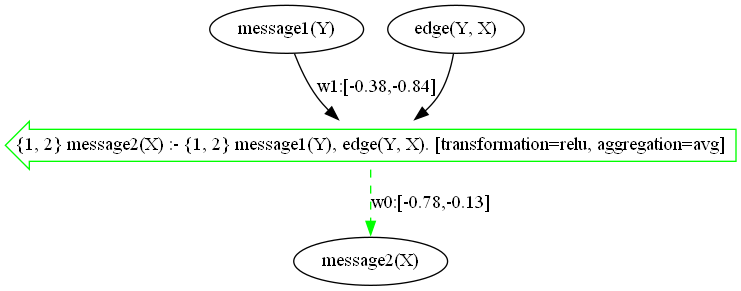

In [3]:
template = Template()
#template += (R.message2(V.X)[1, 2] <= ([R.message1(V.Y)[1, 2], R.edge(V.Y, V.X)])) | [Transformation.RELU, Aggregation.AVG]
template += (R.message2(V.X)[1, 2] <= F.avg[F.relu([R.message1(V.Y)[1, 2], R.edge(V.Y, V.X)])])

template.draw()

In [ ]:
a = [1, 2]
b = list(a)
print(b)

Multiple Combinations at the same time

In [ ]:
template = Template()
template += (R.a <= (x:=R.b, y:= R.c, z:= R.d, q:= R.e)) >> F.avg[F.relu(x * y * z * q)]

template.draw()

All following code will throw exception.

In [ ]:
template = Template()
template += (R.a <= (x:=R.b, y:= R.c, z:= R.d, q:= R.e)) >> F.avg[F.relu(x * y + z * q)]
